**Logistic Regression Model for Obesity Classification Based on Weight Data**

In [182]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [183]:
df = pd.read_csv("bmi_dataset.csv")
df.head()

Weight  Obese
0  45.521410      0
1  46.244087      1
2  47.357189      0
3  47.766521      0
4  48.058136      0

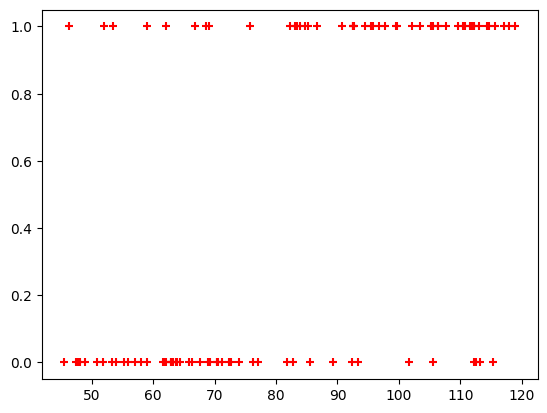

In [184]:
plt.scatter(df.Weight,df.Obese,marker='+',color='red')

In [185]:
import random
# Features and target
X = df[["Weight"]].values
Y = df[["Obese"]].values

unique_indices = []
while len(unique_indices) < 100:
    idx = random.randint(0, len(df) - 1)   # random index
    if idx not in unique_indices:          # avoid duplicates
        unique_indices.append(idx)

print(unique_indices)

[37, 23, 33, 28, 57, 34, 36, 6, 63, 40, 7, 44, 87, 90, 2, 68, 67, 55, 9, 41, 43, 93, 4, 21, 76, 89, 51, 11, 5, 48, 50, 81, 42, 53, 79, 18, 35, 47, 27, 19, 20, 15, 1, 22, 74, 92, 82, 97, 70, 49, 10, 46, 96, 62, 84, 98, 52, 72, 58, 54, 24, 25, 88, 45, 66, 77, 8, 94, 69, 80, 16, 30, 65, 83, 61, 85, 75, 14, 78, 39, 59, 56, 99, 17, 3, 95, 64, 12, 71, 91, 26, 29, 60, 73, 0, 31, 13, 32, 86, 38]


In [186]:
# First 90 for training
train_idx = unique_indices[:90]
test_idx = unique_indices[90:]

# Create train/test splits
X_train = np.array([X[i] for i in train_idx])
Y_train = np.array([Y[i] for i in train_idx])

X_test = np.array([X[i] for i in test_idx])
Y_test = np.array([Y[i] for i in test_idx])



print("X_train length:", len(X_train))
print("Y_train length:", len(Y_train))
print("X_test length:", len(X_test))
print("Y_test length:", len(Y_test))
print(X_test)

X_train length: 90
Y_train length: 90
X_test length: 10
Y_test length: 10
[[ 63.69691719]
 [ 65.89848482]
 [ 92.42293729]
 [101.6663354 ]
 [ 45.52140979]
 [ 66.73135897]
 [ 55.86711541]
 [ 67.56587324]
 [111.9419249 ]
 [ 70.42723433]]


In [187]:
Y_train = Y_train.ravel()
Y_test  = Y_test.ravel()
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

print(X_test)

[[ 63.69691719]
 [ 65.89848482]
 [ 92.42293729]
 [101.6663354 ]
 [ 45.52140979]
 [ 66.73135897]
 [ 55.86711541]
 [ 67.56587324]
 [111.9419249 ]
 [ 70.42723433]]


In [188]:
model.fit(X_train, Y_train)

LogisticRegression()

In [189]:
print(X_test)

[[ 63.69691719]
 [ 65.89848482]
 [ 92.42293729]
 [101.6663354 ]
 [ 45.52140979]
 [ 66.73135897]
 [ 55.86711541]
 [ 67.56587324]
 [111.9419249 ]
 [ 70.42723433]]


In [190]:
y_predicted = model.predict(X_test)

In [191]:
model.predict_proba(X_test)

array([[0.72345577, 0.27654423],
       [0.69682908, 0.30317092],
       [0.32583807, 0.67416193],
       [0.21917707, 0.78082293],
       [0.88392812, 0.11607188],
       [0.68638673, 0.31361327],
       [0.80564631, 0.19435369],
       [0.67573094, 0.32426906],
       [0.13301643, 0.86698357],
       [0.63784162, 0.36215838]])

In [192]:
model.score(X_test,Y_test)

0.7

In [193]:
y_predicted

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [194]:
model.coef_

array([[0.05878776]])

In [195]:
model.intercept_

array([-4.70626785])

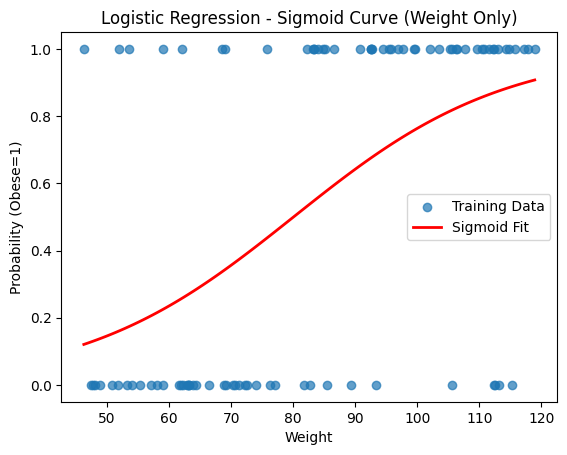

In [196]:
x_vals = X_train[:, 0]
x_sorted = np.linspace(min(x_vals), max(x_vals), 100)

# Extract model parameters
w = model.coef_[0][0]
b = model.intercept_[0]

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

y_sigmoid = sigmoid(w * x_sorted + b)

# Plot
plt.scatter(x_vals, Y_train, label="Training Data", alpha=0.7)
plt.plot(x_sorted, y_sigmoid, color="red", label="Sigmoid Fit", linewidth=2)
plt.xlabel("Weight")
plt.ylabel("Probability (Obese=1)")
plt.title("Logistic Regression - Sigmoid Curve (Weight Only)")
plt.legend()
plt.show()

In [197]:
print(sigmoid(68))

1.0
